## Machine Learning Lab Practical 5 (Part 2) - TensorFlow (13/09/2024)

ชื่อ นายฉัตรดนัย ปูทอง

รหัสนักศึกษา 116510462029-9

e-mail earthtyjoy11@gmail.com

# 1. ตัวอย่างปัญหา Multi-class Classification ใน Computer Vision

แบบฝึกหัดนี้ นศ. จะได้เรียนรู้เกี่ยวกับการใช้ TensorFlow library ในการสร้างโมเดวเพื่อแก้ปัญหา Multi-class classification โดยจะใช้ตัวอย่างด้าน Computer Vision เป็นแบบฝึกหัด โดยอ้างอิงจาก

[Reference 1](https://developers.google.com/codelabs/tensorflow-2-computervision#0)
[Reference 2 (TensorFlow tutorial on Youtube)](https://www.youtube.com/watch?v=bemDFpNooA8&list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO)
[Reference 3](https://www.tensorflow.org/tutorials/keras/classification)
และ
[Reference 4](https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab2-Computer-Vision.ipynb#scrollTo=q3KzJyjv3rnA)



แบบฝึกหัดนี้ เราจะใช้ TensorFlow ในการสร้าง neural network เพื่อแก้ปัญหา multi-class classification ให้สามารถเรียนรู้และจำแนกประเภทภาพของเครื่องแต่งตัว

สำหรับข้อมูลภาพเครื่องแต่งตัว เราจะใช้ข้อมูล [fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) ซึ่งประกอบด้วยรูปภาพเครื่องแตต่ตัว (เช่น หมวก เสื้อ รองเท้า เป็นต้น)

ข้อมูลตัวอย่าง fashion MNIST มีลักษณะเป็นภาพขาว-ดำ (grey scale) ที่มีขนาด 28x28 pixels จำนวน 60,00 ภาพ และข้อมูลทดสอบ (Testing dataset) 10,000 ภาพ ได้แบ่งภาพออกเป็น 10 ประเภทได้ (สามารถดูรายละเอียดได้ [ทีนี่](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data))

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

1.1 import library ที่เกี่ยวข้อง

In [1]:
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt

2.18.0


1.2 โหลดข้อมูล fasion MNIST ได้โดยตรงโยผ่านทาง API ของ tf.keras

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

#โหลด training data และ testing data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1.3 ทดลองแสดงตัวอย่างข้อมูลและรูปภาพ

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

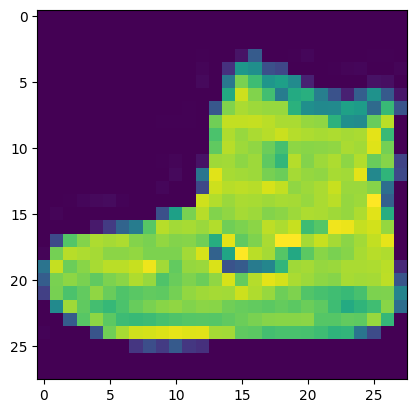

In [ ]:
sample_index = 0 #แสดงตัวอย่าง item ที่ 0

print(training_labels[sample_index])
print(training_images[sample_index])
plt.imshow(training_images[sample_index])

1.4 ทำการ normalization
เนื่องจากข้อมูลใน training&testing image มีค่าอยู่ระหว่าง 0..255 จึงควรทำการ nomramalize ให้มีค่าระหว่าง 0..1 แทน

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0



In [ ]:
print(training_images[sample_index])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

1.5 สร้างโมเดล Multi-Class Classification ด้วย Neural Network โดยใช้ TensorFlow library

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

1.5 Compile โมเดลและทำการ train model และดูสรุปภาพรวมโมเดล

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7830 - loss: 0.6229
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8636 - loss: 0.3758
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8785 - loss: 0.3346
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8860 - loss: 0.3059
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8912 - loss: 0.2920


1.6 สรุปโมเดล

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 10)                    │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8753 - loss: 0.3419


[0.3422664999961853, 0.8758999705314636]

1.8 ทดลองทำนายผลจากโมเดล และเปรียบเทียบกับคำตอบ

In [ ]:
classifications = model.predict(test_images)

print(f"Prediction result: {classifications[0]}")
print(f"True answer ={test_labels[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Prediction result: [4.0543488e-05 2.0519835e-08 1.6094512e-07 6.2072775e-10 1.4141731e-06
 2.3458528e-03 2.0008226e-06 3.1239353e-02 6.1487691e-07 9.6637011e-01]
True answer =9


1.9 ทดลองเปลี่ยนจำนวน neuron ของ Dense layer จาก 128 เป็น 1024
 แล้วเปรียบเทียบผล

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=5)

eva = model.evaluate(test_images, test_labels)
print(eva)

classifications = model.predict(test_images)

print(f"Prediction result: {classifications[0]}")
print(f"True answer ={test_labels[0]}")


model.summary()

2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7972 - loss: 0.5764
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8671 - loss: 0.3617
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8818 - loss: 0.3246
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8901 - loss: 0.2972
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8951 - loss: 0.2795
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8698 - loss: 0.3709
[0.36962461471557617, 0.8689000010490417]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Prediction result: [2.0734115e-07 5.0766765e-08 1.3561419e-08 2.0917719e-10 1.1056902e-08
 3.0707500e-03 1.3654996e-07 1.4216016e-03 5.2449657e-08 9.9550730e-01]
True answer =9


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 1024)                  │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 10)                    │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,442,272 (9.32 MB)

 Trainable params: 814,090 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,628,182 (6.21 MB)

เขียนคำอธิบายผลข้อ 1.9 ที่นี่....

```
# คำอธิบาย
 ผลที่แสดงหลังจากทำหารรันแล้ว จะเรียงดังนี่
  ส่วนที่ 1 จะแสดงเวอร์ชั่นของ tenserflow
  ส่วนที่ 2 จะแสดงการฝึกโมเดลจำนวน 5 ครั้ง แสดงค่าความแม่นยำและความสูญเสีย ของแต่ละครั้งของการฝึกโมเดล
  ส่วนที่ 3 จะแสดงค่าของ loss  และค่าของความแม่นยำ จากการทดสอบ
  ส่วนที่ 4 โมเดลจะแสดงผลจากการทำนาย โดยจะดูตัวที่มากที่สุดแล้วนำตำแหน่งของคลาสนั้น เทียบกับคำตอบจริง ซึ่งถ้าตรงกัน
          (ในที่นี้ เป็น 9 เหมือนกัน) ถือว่าโมเดลมีการทำนายที่ถูกต้อง
  ส่วนที่ 5 ส่วนแสดงผลสรุปของโมเดล จะแสดงในส่วนของเลเยอร์ต่างๆ และสรุปพารามิเตอร์ทั้งหมด ทั้งที่สามารถฝึกได้และฝึกไม่ได้

```



1.10 Callback function ในการสิ้นสุดการ train ก่อนครบจำนวน epoch

ใช้งานในกรณีทีเราได้โมเดลที่มีค่า accuracy ตามที่ต้องการแล้ว และไม่จำเป็นต้องรอให้ train โมเดลจนครบตามจำนนวรอบ epoch ที่ระบุไว้ตอนแรก


In [ ]:
import tensorflow as tf

#----------------------------------
# ตัวอย่าง callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

##---------------------------------

callbacks = myCallback()


mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

model.summary()




Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7925 - loss: 0.5929
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8660 - loss: 0.3646
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8783 - loss: 0.3264
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8880 - loss: 0.3017
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8977 - loss: 0.2775
Epoch 6/50
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9001 - loss: 0.2659
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9001 - loss: 0.2659


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 512)                   │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 10)                    │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)